In [ ]:
import pandas as pd
import os
import re


def calculate_average(csv_file):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(
            csv_file,
            delimiter=";",
            header=None,
            names=["Col1", "Col2", "Col3", "Value"],
        )

        # Calculate the average of the last column
        average = df["Value"].mean()
        print(average)
        return average

    except pd.errors.EmptyDataError:
        print("The CSV file is empty.")
    except pd.errors.ParserError:
        print("Error parsing the CSV file. Please check the file format.")
    except Exception as e:
        print(f"An error occurred: {e}")


def extract_info_from_filename(filename):
    # Extract information from the filename using regular expressions
    match = re.match(r"auto-(\d+)-(\d+)-(\w+).csv", filename)
    if match:
        class_label = match.group(3)
        sensor = int(match.group(2))
        return class_label, sensor
    else:
        return None, None


def calculate_average_for_folder(folder_path):
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Initialize lists to store information
        class_labels = []
        sensors = []
        latencies = []

        # Loop through all files in the directory
        for filename in os.listdir(folder_path):
            # Check if the file is a CSV file and contains 'auto-600' in its name
            if filename.endswith(".csv") and "auto-600" in filename:
                file_path = os.path.join(folder_path, filename)
                avg = calculate_average(file_path)

                if avg is not None:
                    class_label, sensor = extract_info_from_filename(filename)
                    class_labels.append(class_label)
                    sensors.append(sensor)
                    latencies.append(avg)

        # Create a DataFrame
        df = pd.DataFrame(
            {"class": class_labels, "sensor": sensors, "latency": latencies}
        )
        return df
    else:
        print(f"{folder_path} is not a valid directory.")
        return None


# Replace 'your_folder_path' with the actual path to your folder containing CSV files
result_df = calculate_average_for_folder("../src/new-experiments/")

if result_df is not None:
    print(result_df)

# Replace 'your_folder_path' with the actual path to your folder containing CSV files
# Replace 'your_file.csv' with the actual path to your CSV file
# calculate_average('../src/new-experiments/auto-600-30-Features.csv')

In [ ]:
result_df

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the maximum x-value
max_x = 100

# Define the width of the bars
bar_width = 0.35  # Adjust as needed for spacing

# filename = "../src/new-experiments/iotinuum-latency.csv"
result_df = result_df.sort_values(by="sensor")

df = result_df
# Define the functions
# df = pd.read_csv(filename, delimiter=",")
raw_data = df[df["class"] == "RawExtract"]
feature_data = df[df["class"] == "Features"]
x_values = raw_data["sensor"]

colors = ["#deebf7", "#3182bd"]
patterns = ["--", "xx", ".."]
labels = ["mist", "cloud"]

# Get unique categorical values for x-axis
unique_x_values = x_values.unique()
x_indices = np.arange(len(unique_x_values))

# Plot the bar chart with proper spacing
plt.figure(figsize=(4, 3))
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, (data, color, pattern) in enumerate(
    zip([raw_data["latency"], feature_data["latency"]], colors, patterns)
):
    x_offset = i * bar_width
    plt.bar(
        x_indices - bar_width / 2 + x_offset,  # Adjusted for even spacing
        data,
        width=bar_width,
        label=labels[i],
        alpha=1,
        color=color,
        edgecolor="black",
        linewidth=0.5,
    )

# Add a legend
plt.legend()

# Set labels and title
plt.xlabel("Things")
plt.ylabel("Latency")

# Set the legend to be horizontal at the top
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 1), ncol=3, columnspacing=0.5)

# Show the plot
plt.xticks(
    x_indices, unique_x_values
)  # Use indices for ticks and categories for labels
plt.tight_layout()
plt.savefig(f"graph.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [15]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt


def calculate_average(csv_file):
    try:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(
            csv_file,
            delimiter=";",
            header=None,
            names=["Col1", "Col2", "Col3", "Value"],
        )

        # Calculate the average of the last column
        average = df["Value"].mean()
        return average

    except pd.errors.EmptyDataError:
        print(f"The CSV file {csv_file} is empty.")
        return None
    except pd.errors.ParserError:
        print(f"Error parsing the CSV file {csv_file}. Please check the file format.")
        return None
    except Exception as e:
        print(f"An error occurred for {csv_file}: {e}")
        return None


def plot_boxplot_for_folder(folder_path):
    # Check if the path is a directory
    if os.path.isdir(folder_path):
        # Initialize lists to store information
        boxplot_df = pd.DataFrame(columns=["filename", "latencies"])

        # Loop through all files in the directory
        for filename in os.listdir(folder_path):
            # Check if the file is a CSV file and contains 'auto-600' in its name
            if filename.endswith(".csv") and "auto-600" in filename:
                print(filename)
                file_path = os.path.join(folder_path, filename)
                df = pd.read_csv(
                    file_path,
                    delimiter=";",
                    header=None,
                    names=["Col1", "Col2", "Col3", "Value"],
                )
                latencies = df["Value"]
                # print(latencies[0])
                # print(filename)
                new_row = {"filename": filename, "latencies": latencies}
                boxplot_df = pd.concat(
                    [boxplot_df, pd.DataFrame([new_row])], ignore_index=True
                )
                # boxplot_df.append({"filename": filename, "latencies": latencies})

                # Calculate the average of the last column
                # # Plot boxplot for the current file
                # plt.boxplot(latencies, labels=filenames)

                # plt.xlabel('Filename')
                # plt.ylabel('Latency')
                # plt.title('Boxplot of Latency for Each File')
                # plt.show()

        return boxplot_df


# Replace 'your_folder_path' with the actual path to your folder containing CSV files
complete_df = plot_boxplot_for_folder("../src/new-experiments/")

auto-600-120-Features.csv
auto-600-480-Features.csv
auto-600-60-Features.csv
auto-600-400-Features.csv
auto-600-600-RawExtract.csv
auto-600-200-Features.csv
auto-600-200-RawExtract.csv
auto-600-240-Features.csv
auto-600-400-RawExtract.csv
auto-600-30-Features.csv
auto-600-120-RawExtract.csv
auto-600-480-RawExtract.csv
auto-600-60-RawExtract.csv
auto-600-600-Features.csv
auto-600-30-RawExtract.csv
auto-600-240-RawExtract.csv


In [16]:
complete_df["class"] = complete_df["filename"].str.extract(
    r"auto-(\d+)-(\d+)-(\w+).csv"
)[2]
complete_df["sensors"] = complete_df["filename"].str.extract(r"auto-\d+-(\d+)-")

# Map 'Features' and 'RawExtract' values to 'class' column
complete_df["class"] = complete_df["class"].map(
    {"Features": "Feature", "RawExtract": "RawExtract"}
)
if "filename" in complete_df.columns:
    complete_df = complete_df.drop("filename", axis=1)
# complete_df = complete_df.sort_values(by='sensors')
# Display the result
complete_df.head(4)

,latencies,class,sensors
0,0 0.025174 1 0.018087 2 0.01...,Feature,120
1,0 0.022192 1 0.020935 2 0...,Feature,480
2,0 0.032799 1 0.022344 2 0.01...,Feature,60
3,0 0.029797 1 0.018472 2 0...,Feature,400


In [17]:
# Explode the 'latencies' column
df_expanded = complete_df.explode('latencies')

# # Duplicate 'class' and 'sensors' values for each item in 'latencies'
# df_expanded['class'] = df_expanded['class'].repeat(df_expanded['latencies'].apply(len))
# df_expanded['sensors'] = df_expanded['sensors'].repeat(df_expanded['latencies'].apply(len))

# # Reset index for a cleaner DataFrame
# df_expanded.reset_index(drop=True, inplace=True)

# # Rename 'latencies' column to 'latency'
# df_expanded.rename(columns={'latencies': 'latency'}, inplace=True)
df = df_expanded 
df['sensors'] = df['sensors'].astype(int)
df.sort_values(by='sensors')

df = df.replace(to_replace='Feature',value='mist')
df = df.replace(to_replace='RawExtract',value='cloud')
df

,latencies,class,sensors
0,0.025174,mist,120
0,0.018087,mist,120
0,0.019724,mist,120
0,0.019107,mist,120
0,0.020673,mist,120
...,...,...,...
15,0.044335,cloud,240
15,0.042937,cloud,240
15,0.043428,cloud,240
15,0.043041,cloud,240


In [18]:
df = df.replace(to_replace='mist',value='S2-Mist')
df = df.replace(to_replace='cloud',value='S5-Cloud')
df = df.rename(columns={"class": "Stage"})

rslt_df = df[df['sensors'] < 250 ] 
rslt_df = rslt_df[rslt_df['sensors'] > 30 ] 
rslt_df = rslt_df[rslt_df['sensors'] != 200 ] 


rslt_df['latencies'] = rslt_df['latencies'] * 1000

rslt_df

,latencies,Stage,sensors
0,25.173896,S2-Mist,120
0,18.08697,S2-Mist,120
0,19.723849,S2-Mist,120
0,19.107138,S2-Mist,120
0,20.672717,S2-Mist,120
...,...,...,...
15,44.334523,S5-Cloud,240
15,42.936683,S5-Cloud,240
15,43.427911,S5-Cloud,240
15,43.040892,S5-Cloud,240


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# data = complete_df['latencies'].iloc[0]

fig = plt.figure(figsize=(10, 7))

plt.boxplot(
    complete_df["latencies"],
    vert=True,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=complete_df["sensors"],
    showfliers=False,
)


# Show the plot
plt.show()

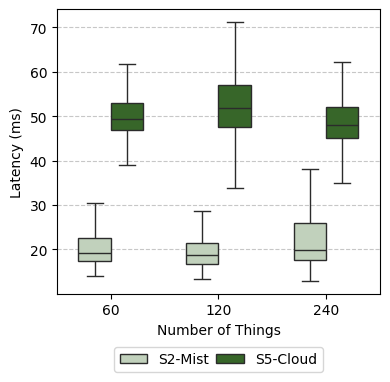

In [21]:
# Customization
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.figure(figsize=(4, 4))
plt.grid(axis="y", linestyle="--", alpha=0.7)

# colors = ["#deebf7", "#3182bd"]
# Define a custom color palette
custom_palette = {"S2-Mist": "#bfd5b8", "S5-Cloud": "#32701f"}
# Create and display the plot
sns.boxplot(x="sensors",
            y="latencies",
            hue="Stage",
            data=rslt_df,
            palette=custom_palette,  # Use the custom palette
            width=0.6,
            linewidth=1,
            showfliers = False
            )  

# Add a title

# Add labels to the axes
plt.xlabel("Number of Things")
plt.ylabel("Latency (ms)")
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, columnspacing=0.5)

plt.tight_layout()
plt.savefig(f"boxplots.pdf", format="pdf", bbox_inches="tight")
plt.show()
# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(19680801)
all_data = [np.random.normal(0, std, size=100) for std in range(1, 4)]
labels = ["x1", "x2", "x3"]

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = ax1.boxplot(
    complete_df["latencies"].head(3),
    vert=True,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=complete_df["sensors"].head(3),
    showfliers=False,
)  # will be used to label x-ticks
ax1.set_title("Rectangular box plot")

# notch shape box plot
bplot2 = ax2.boxplot(
    all_data,
    notch=True,  # notch shape
    vert=True,  # vertical box alignment
    patch_artist=True,  # fill with color
    labels=labels,
)  # will be used to label x-ticks
ax2.set_title("Notched box plot")

# fill with colors
colors = ["pink", "lightblue", "lightgreen"]
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot["boxes"], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_xlabel("Three separate samples")
    ax.set_ylabel("Observed values")

plt.show()

In [83]:
y_values = np.array([ "60", "120", "240"])

[ 50 110 170]
[ 60 120 180]
[ 70 130 190]


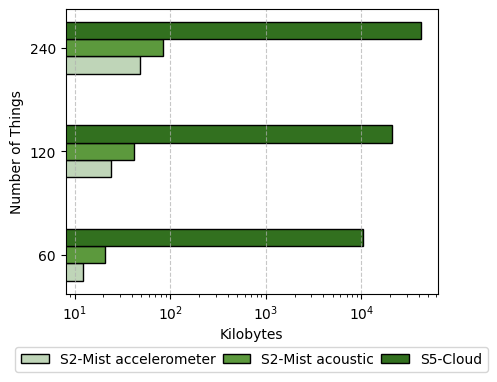

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Define the maximum y-value
max_y_kb = 1775440  # Maximum y-value in kilobytes

# Define the y values with a small offset for spacing
# y_values = np.arange(60, 241, 60)

# Define the height of the bars
bar_height = 10  # Adjust as needed for spacing
y_values = np.array([ 60, 120, 240])
# Define the functions
f1 = [(207 / 1024) * y for y in y_values]
f2 = [(357 / 1024) * y for y in y_values]
f3 = [(177544 / 1024) * y for y in y_values]


y_labels = np.array([ "60", "120", "240"])
# colors = ['#deebf7', '#9ecae1', '#3182bd']
colors = ["#bfd5b8", "#5c993d", "#32701f"]
patterns = ["--", "xx", ".."]
labels = ["S2-Mist accelerometer", "S2-Mist acoustic", "S5-Cloud"]

# Plot the horizontal bar chart with proper spacing
plt.figure(figsize=(5, 4))
plt.grid(axis="x", linestyle="--", alpha=0.7)
y_set = np.array([ 60, 120, 180])
for i, (data, color, pattern) in enumerate(zip([f1, f2, f3], colors, patterns)):
    y_offset = i * bar_height
    # print(labels[i])
    # print(data)
    print(y_set - bar_height + y_offset)
    plt.barh(
        
        y=y_set - bar_height + y_offset,
        width=data,
        height=bar_height,
        label=labels[i],
        alpha=1,
        color=color,
        # hatch=pattern,
        edgecolor="black",  # Add a black border
        linewidth=1,  # Adjust the border thickness
    )

# Add a legend
plt.legend()

# Set labels and title
plt.ylabel("Number of Things")
plt.xlabel("Kilobytes")  # Change the x-axis label

# Set the x-axis to log scale
plt.xscale("log")

# Set the legend to be horizontal at the bottom
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=3, columnspacing=0.5)

# Show the plot
plt.yticks(y_set, y_labels)  # Show the original y-values on the y-axis
plt.tight_layout()
# plt.show()
plt.savefig(f"payload_size_horizontal_kb2.pdf", format="pdf", bbox_inches="tight")